In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mcdonalds/mcdonalds.csv


In [51]:
import pandas as pd
import numpy as np

In [52]:
mcdonalds=pd.read_csv('/kaggle/input/mcdonalds/mcdonalds.csv')

In [53]:
print(mcdonalds.shape)

print(mcdonalds.head(3))

(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  


In [54]:
MD_x = mcdonalds.iloc[:, 1:12].values

MD_x_binary = (MD_x == "Yes").astype(int)


col_means = np.round(MD_x_binary.mean(axis=0), 2)

print(col_means)

[0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24 0.  ]


In [55]:
MD_x

array([['Yes', 'No', 'Yes', ..., 'No', 'No', '-3'],
       ['Yes', 'No', 'Yes', ..., 'No', 'No', '2'],
       ['Yes', 'Yes', 'Yes', ..., 'Yes', 'No', '1'],
       ...,
       ['Yes', 'No', 'Yes', ..., 'No', 'No', '3'],
       ['Yes', 'No', 'No', ..., 'Yes', 'No', '4'],
       ['Yes', 'No', 'Yes', ..., 'No', 'Yes', '-3']], dtype=object)

In [56]:
from sklearn.decomposition import PCA

In [57]:
MD_x = mcdonalds.iloc[:, 1:12].values

# Convert the matrix to a binary matrix where "Yes" is 1 and other values are 0
MD_x_binary = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x_binary)

# Print a summary of the PCA results
print("Explained variance ratio:", np.round(pca.explained_variance_ratio_, 4))
print("Singular values:", np.round(pca.singular_values_, 4))
print("Components:", pca.components_)

# If you want to display the explained variance for each principal component
explained_variance = np.round(pca.explained_variance_ratio_, 4)
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance*100}% of variance")

Explained variance ratio: [0.2952 0.1929 0.1311 0.0951 0.0642 0.0566 0.0485 0.0454 0.0373 0.0337
 0.    ]
Singular values: [26.7273 21.6027 17.8104 15.1692 12.4619 11.7047 10.8357 10.4833  9.5018
  9.0324  0.    ]
Components: [[-0.15222071 -0.00132849  0.13175506  0.35042294 -0.13435956 -0.51012708
  -0.35886306  0.51181853 -0.2074227   0.35302161 -0.        ]
 [ 0.06712002  0.01462136 -0.18689384 -0.45473366 -0.05349595 -0.50171502
   0.37391704  0.44668359  0.22105571 -0.33284159 -0.        ]
 [-0.17642248 -0.0655621  -0.27131751 -0.65159168 -0.09791477  0.00606812
  -0.62631558 -0.10988566  0.08170572  0.21388267  0.        ]
 [-0.11427391  0.21133138 -0.34343557  0.29494215 -0.08272792  0.11038836
   0.0621956   0.08082229  0.77873682  0.31856018  0.        ]
 [-0.15940701  0.09169811  0.14010445 -0.33748334  0.03083033  0.13742978
   0.51862889  0.08714178 -0.21206419  0.70091249  0.        ]
 [-0.38889408 -0.24291352 -0.43287131  0.15865381 -0.61659312 -0.08426298
   0.23749281 -

In [58]:
# Define a function to print PCA summary with specified digits
def print_pca_summary(pca_model, digits):
    print(f"Standard deviations (1/digits):")
    print(np.round(pca_model.explained_variance_, digits))
    print(f"Rotation (n x k):")
    print(np.round(pca_model.components_, digits))
    print(f"Scores (n x k):")
    print(np.round(pca_model.transform(MD_x_binary), digits))

# Print PCA summary with 1 decimal place
print_pca_summary(MD_pca, digits=1)

Standard deviations (1/digits):
[0.5 0.3 0.2 0.2 0.1 0.1 0.1 0.1 0.1 0.1 0. ]
Rotation (n x k):
[[-0.2 -0.   0.1  0.4 -0.1 -0.5 -0.4  0.5 -0.2  0.4 -0. ]
 [ 0.1  0.  -0.2 -0.5 -0.1 -0.5  0.4  0.4  0.2 -0.3 -0. ]
 [-0.2 -0.1 -0.3 -0.7 -0.1  0.  -0.6 -0.1  0.1  0.2  0. ]
 [-0.1  0.2 -0.3  0.3 -0.1  0.1  0.1  0.1  0.8  0.3  0. ]
 [-0.2  0.1  0.1 -0.3  0.   0.1  0.5  0.1 -0.2  0.7  0. ]
 [-0.4 -0.2 -0.4  0.2 -0.6 -0.1  0.2 -0.2 -0.3 -0.1 -0. ]
 [ 0.   0.9 -0.4  0.   0.1 -0.  -0.  -0.  -0.3 -0.1  0. ]
 [-0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2 -0. ]
 [-0.7 -0.  -0.   0.   0.3  0.4 -0.   0.5 -0.1 -0.3  0. ]
 [-0.6  0.1  0.3  0.   0.3 -0.5  0.1 -0.5  0.2 -0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1. ]]
Scores (n x k):
[[ 0.1  0.1  0.6 ...  0.5 -0.6  0. ]
 [ 0.1  0.  -0.7 ...  0.5 -0.5  0. ]
 [ 0.4  0.8 -0.7 ... -0.   0.3  0. ]
 ...
 [ 0.3  1.  -0.1 ...  0.1 -0.   0. ]
 [-1.1  0.4  0.4 ...  0.  -0.1  0. ]
 [ 1.5 -0.1  0.2 ... -0.4 -0.5  0. ]]


In [59]:
import matplotlib.pyplot as plt

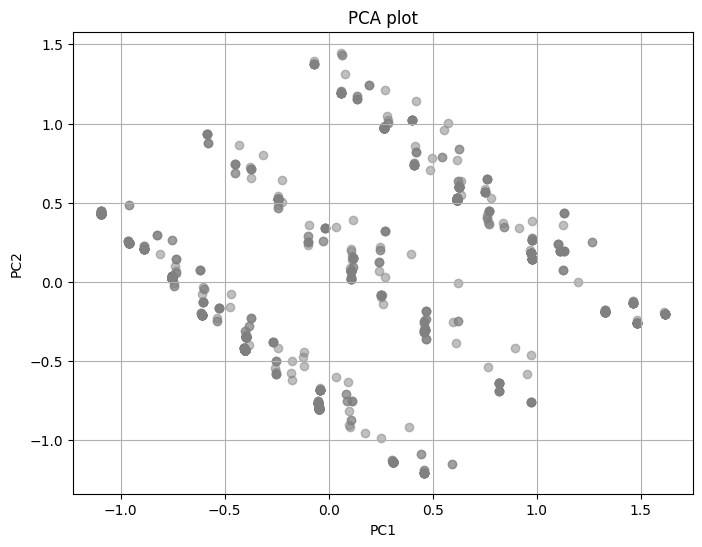

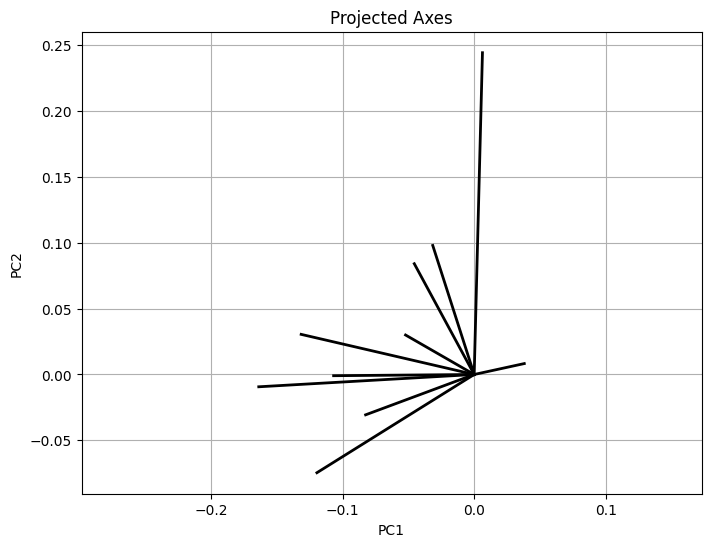

In [60]:

MD_x = mcdonalds.iloc[:, 1:12].values

# Convert the matrix to a binary matrix where "Yes" is 1 and other values are 0
MD_x_binary = (MD_x == "Yes").astype(int)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_binary)

# Plotting PCA results
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.5)
plt.title('PCA plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Projecting axes
plt.figure(figsize=(8, 6))
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)  # Scale vector to match length
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=2)
plt.title('Projected Axes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')
plt.show()


In [61]:
from sklearn.cluster import KMeans

In [62]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Select the first 11 columns and convert to a matrix
MD_x = mcdonalds.iloc[:, 1:12].values

# Convert the matrix to a binary matrix where "Yes" is 1 and other values are 0
MD_x_binary = (MD_x == "Yes").astype(int)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_binary)

# Perform k-means clustering with multiple k values and repetitions
k_range = range(2, 9)  # clusters from 2 to 8
n_reps = 10  # number of repetitions
best_score = np.inf
best_model = None

for k in k_range:
    for _ in range(n_reps):
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(MD_x_scaled)
        if kmeans.inertia_ < best_score:
            best_score = kmeans.inertia_
            best_model = kmeans

# Relabel the clusters (optional step in flexclust)
cluster_labels = best_model.labels_

# Print the cluster labels
print(cluster_labels)


[1 4 7 ... 0 3 6]


In [69]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [64]:
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

In [47]:
within_cluster_distances

[2779.0406056434963,
 2145.503726917162,
 1818.7176591653842,
 1604.1072915407908,
 1434.6104173514605,
 1331.6524400071694,
 1248.4178870553137,
 1182.100018613879]

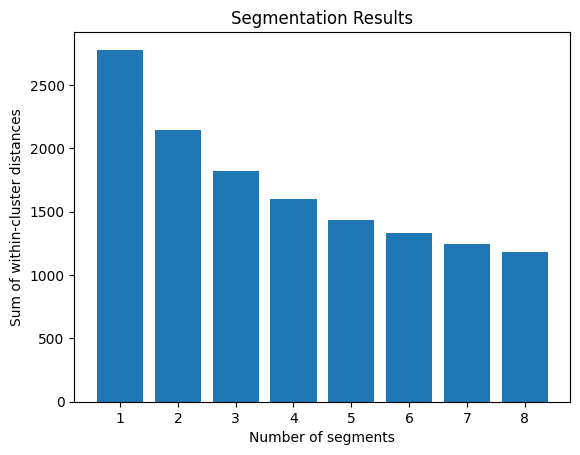

In [48]:
plt.bar(num_segments, within_cluster_distances)
plt.xlabel("Number of segments")
plt.ylabel("Sum of within-cluster distances")
plt.title("Segmentation Results")
plt.show()

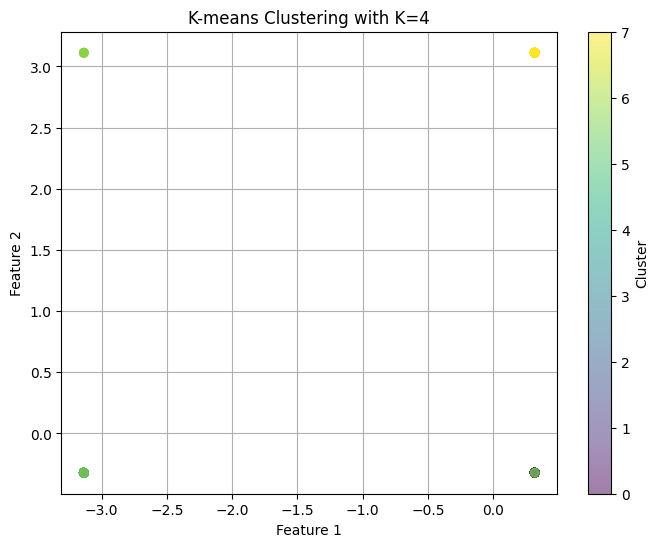

In [77]:
MD_x = mcdonalds.iloc[:, 1:12].values

# Convert the matrix to a binary matrix where "Yes" is 1 and other values are 0
MD_x_binary = (MD_x == "Yes").astype(int)

# Standardize the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_binary)
plt.figure(figsize=(8, 6))
plt.scatter(MD_x_scaled[:, 0], MD_x_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title(f'K-means Clustering with K={4}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [79]:
np.random.seed(1234)
MD_x=mcdonalds.iloc[:,0:11].replace("Yes",1).replace("No",0)
nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}

for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans


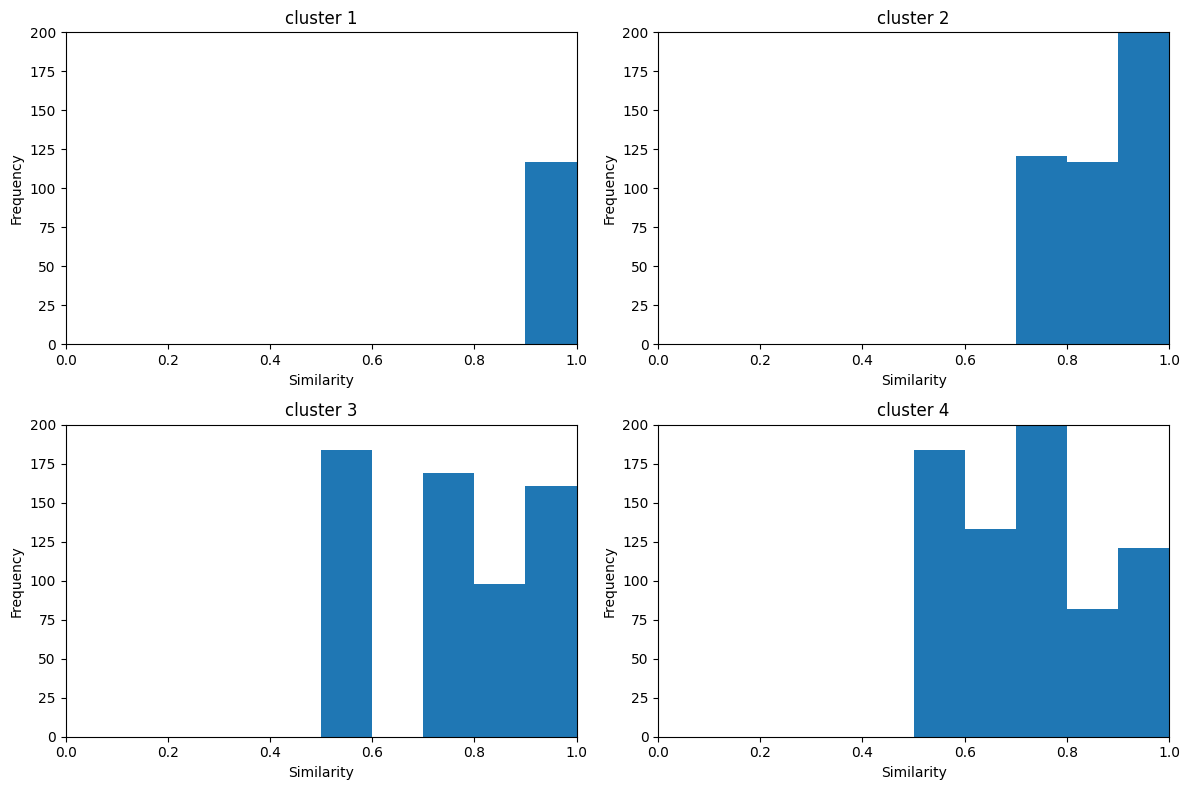

In [80]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

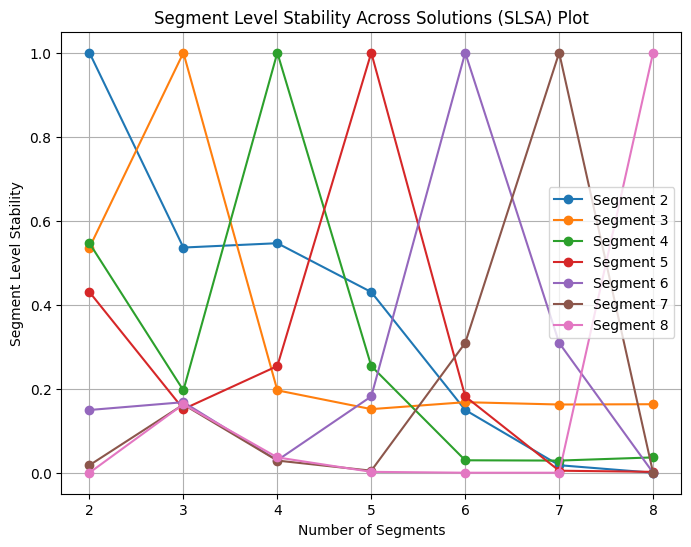

In [81]:
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], marker='o', label=f'Segment {segment}')

plt.xlabel('Number of Segments')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.grid(True)

plt.show()

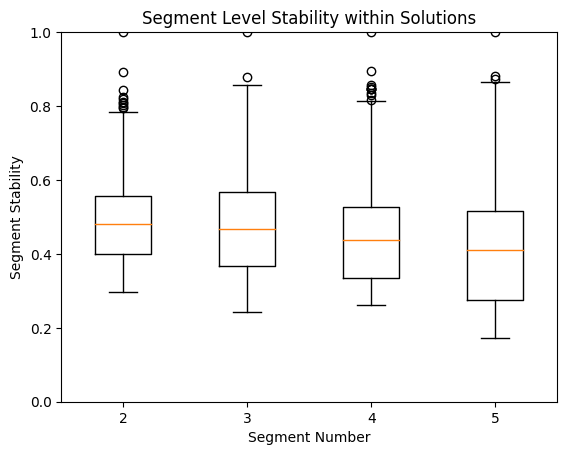

In [82]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [87]:
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


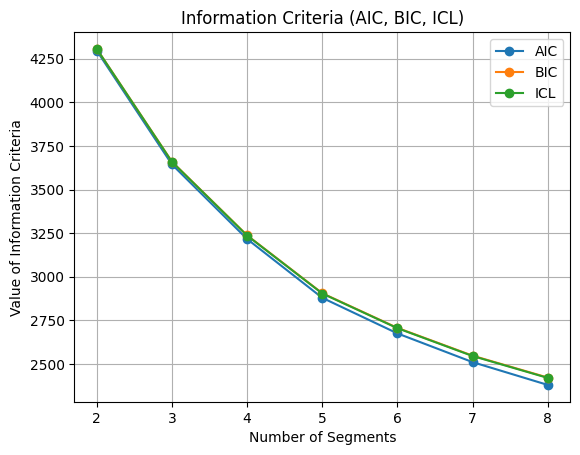

In [88]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC')
plt.plot(num_segments, BIC_values, marker='o', label='BIC')
plt.plot(num_segments, ICL_values, marker='o', label='ICL')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)

plt.show()

In [89]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [95]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)



Log-likelihood for MD.m4a: 6.4092973185477815
Log-likelihood for MD.m4: 5.829670404260979


In [96]:
like_counts = pd.value_counts(mcdonalds['Like'])
reversed_counts = like_counts.iloc[::-1]

print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
1               152
4               160
0               169
2               187
3               229
Name: count, dtype: int64


In [101]:
import warnings
warnings.filterwarnings("ignore")

In [109]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf



# Mapping the ordinal values to numerical values
like_mapping = {
    "I hate it!-5": -5,
    "-4": -4,
    "-3": -3,
    "-2": -2,
    "-1": -1,
    "0": 0,
    "+1": 1,
    "+2": 2,
    "+3": 3,
    "+4": 4,
    "I love it!+5": 5
}

# Create a new column 'Like.n' based on the mapping
mcdonalds['Like.n'] = mcdonalds['Like'].map(like_mapping)

# Display the frequency table of 'Like.n'

# Step 2: Construct the formula dynamically
formula = 'Like.n ~ ' + ' + '.join(mcdonalds.columns[1:12])  # Assuming 12 columns in total




In [110]:
print("Frequency Table of 'Like.n':")
print(mcdonalds['Like.n'].value_counts().sort_index())
print()
print("Formula:", formula)
print("Formula Object:", model)


Frequency Table of 'Like.n':
Like.n
-5.0    152
-4.0     71
-3.0     73
-2.0     59
-1.0     58
 0.0    169
 5.0    143
Name: count, dtype: int64

Formula: Like.n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting + Like
Formula Object: KMeans(random_state=1234)


In [113]:
from patsy import dmatrices

independent_vars = mcdonalds.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=mcdonalds)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [114]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from patsy import dmatrix

np.random.seed(1234)


# Constructing design matrices X and y
X = dmatrix(f.design_info, data=mcdonalds)
y = dmatrix('Like', data=mcdonalds)

n_components = 2
n_init = 10
verbose = False

# Fit Gaussian Mixture Model
model = GaussianMixture(n_components=n_components, n_init=n_init, verbose=verbose)
model.fit(X, y)

# Print the model
print("Gaussian Mixture Model:")
print(model)

# Predict clusters and count sizes
cluster_labels = model.predict(X)
cluster_sizes = np.bincount(cluster_labels)

# Print cluster sizes
print("\nCluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"Cluster {i+1}: {size}")


Gaussian Mixture Model:
GaussianMixture(n_components=2, n_init=10, verbose=False)

Cluster sizes:
Cluster 1: 468
Cluster 2: 985
